# TimeSeries - ARIMA & SARIMAX

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("E:\M60\ml_dataset\perrin-freres-monthly-champagne.csv")
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


#### Change the column name

In [4]:
## Clean up data
df.columns=['Month','sales']
df.head()

,Month,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


#### Drop unnecessay columns

In [5]:
# drop las 2 rows
df.drop(106, axis=0, inplace=True)

In [6]:
df.tail()

,Month,sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [7]:
# drop las 2 rows
df.drop(105, axis=0, inplace=True)

In [8]:
df.tail()

,Month,sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


#### Convert Month into Datetime - Timeseries

In [9]:
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,Month,sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [10]:
# Set index - due to timeindex
df.set_index('Month', inplace=True)

In [11]:
df.head()

,sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sales,105.0,4761.152381,2553.502601,1413.0,3113.0,4217.0,5221.0,13916.0


## Step 2: Visualize the Data

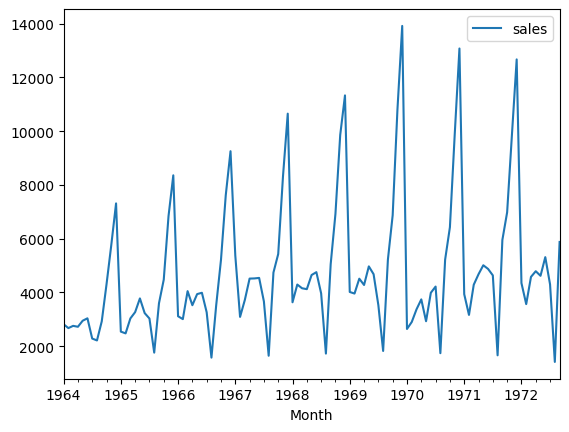

In [13]:
df.plot()
plt.show()

In [14]:
## Testing for stationary
from statsmodels.tsa.stattools import adfuller

In [15]:
# HO: It is non stationary  (Null hypothesis will be rejected if p value <=0.5)
# H1: It is stationary

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistics','p-value','#lags Used','#Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
        if result[1] <= 0.05:       # result[1] indicating accessing p value
            print("Strong Evidence Against the Null Hypothesis (Ho), reject the alternat hypothesis")
        else:
            print("Week evidence against the Null Hypothesis, accept H0, the data is non-stationary")

In [16]:
adfuller_test(df['sales'])

ADF Test Statistics : -1.8335930563276246
Week evidence against the Null Hypothesis, accept H0, the data is non-stationary
p-value : 0.3639157716602442
Week evidence against the Null Hypothesis, accept H0, the data is non-stationary
#lags Used : 11
Week evidence against the Null Hypothesis, accept H0, the data is non-stationary
#Observations Used : 93
Week evidence against the Null Hypothesis, accept H0, the data is non-stationary


In [17]:
.36 > 0.05 # Since the p value is greater than significance value (0.05) so, accept null hypothesis, the data is non-stationary

True

In [18]:
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistics','p-value','#lags Used','#Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    # Use a variable to store the result of the p-value comparison
    reject_null = result[1] <= 0.05
    # Print the message outside of the for loop based on the variable
    if reject_null:
        print("Strong Evidence Against The Null Hypothesis (H0), reject the null hypothesis")
    else:
        print("Weak Evidence Against The Null Hypothesis, accept H0, time series has a unit root,indicating is a non-stationary,  ")

adfuller_test(df['sales'])

ADF Test Statistics : -1.8335930563276246
p-value : 0.3639157716602442
#lags Used : 11
#Observations Used : 93
Weak Evidence Against The Null Hypothesis, accept H0, time series has a unit root,indicating is a non-stationary,  


1. Since the data proved or found as non-stationary, so need to make it stationary
2. Calcuting difference may be effective to make it stationary

### Differencing

In [19]:
df['seasonal first difference'] = df['sales'] - df['sales'].shift(1)
df['seasonal difference'] = df['sales'] - df['sales'].shift(12)
df.head(14)

,sales,seasonal first difference,seasonal difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


1. Shift(1), its checking data by 1 day shifting / see the data change over each day ( or particular time period)
2. Some time we need to check a specific periodical diffence with the data

#### Important Notes:

1. Since the data in not stationary, it is seasonal over 12 month data, so shifting 1 will be good choice, we must do it as seasonal (12 Months) difference
2. See the plot data is seasonal over 12 month seasonal, we seasonal difference need to check

In [20]:
### Again test dickey fuller test
adfuller_test(df['seasonal difference'].dropna())  # dropna is mandatory, if lags # 0 --> it perfect stationary

ADF Test Statistics : -7.626619157213164
p-value : 2.060579696813685e-11
#lags Used : 0
#Observations Used : 92
Strong Evidence Against The Null Hypothesis (H0), reject the null hypothesis


In [21]:
2.060579696813685e-11 < 0.05  # Now p value is less then p significance value i.e 0.05, so now reject null hypothesis

True

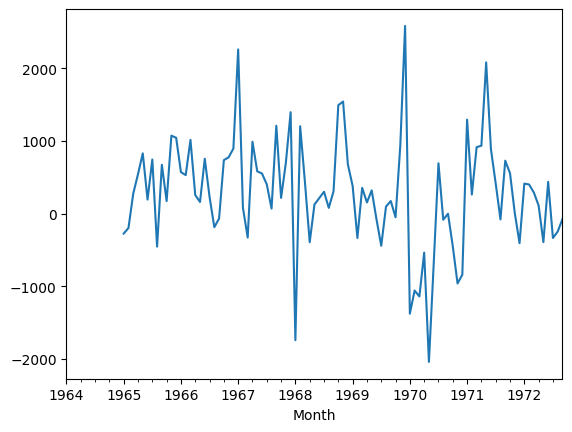

In [22]:
df['seasonal difference'].plot() # now data looks almost stationary, here is some constant mean/ median over the time
plt.show()

1. Once the data becomes stationary, we need to stop over there
2. if there are small variance, that mean we are taking the p value as .05, if p value exactly 0 or ZERO that wil be wonderful stationary graph

## Auto Regressive Model

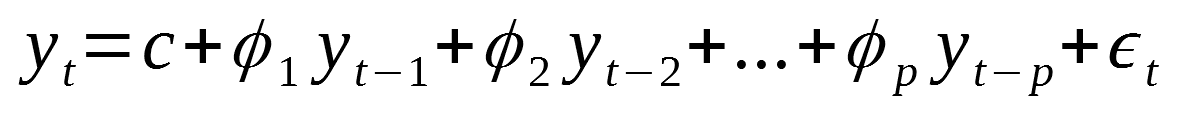

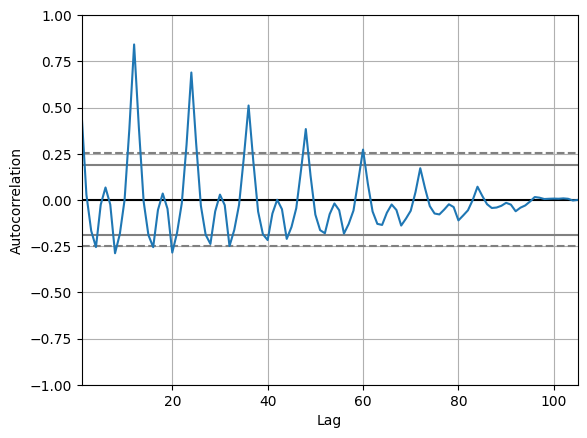

In [23]:
# from pandas.tools.plotting import autocorrelation_plot  # This removed from pandas
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['sales'])
plt.show()

* <b> Autocorrelation Plot:</b>
The autocorrelation_plot function calculates and visualizes the autocorrelation of a time series data.
Autocorrelation measures how a variable correlates with itself at different time lags (shifts).
It’s commonly used for time series analysis to identify patterns related to seasonality or cyclic behavior.

* <b>Interpreting the Graph:</b>
- The resulting graph shows the autocorrelation values for different lags <b>(time shifts)</b>.
- The x-axis represents the <b>lag</b>, which indicates how many time steps back we’re comparing the data.
- The y-axis represents the <b>autocorrelation</b> value, ranging from -1 to 1.
* Key points:

- Peaks or spikes above the dashed horizontal lines indicate significant <b>positive autocorrelation.</b>
- Troughs below the lines indicate significant <b>negative autocorrelation</b>
- The blue line represents the autocorrelation at various lag times.
- The confidence intervals (dashed lines) help identify statistically significant correlations.

** Remember that this plot helps us understand how the ‘sales’ data is correlated with its past values at different time lags. Peaks in the plot can indicate potential seasonality or repeating patterns in the sales data. If you have specific data, you can apply this technique to explore its autocorrelation behavior

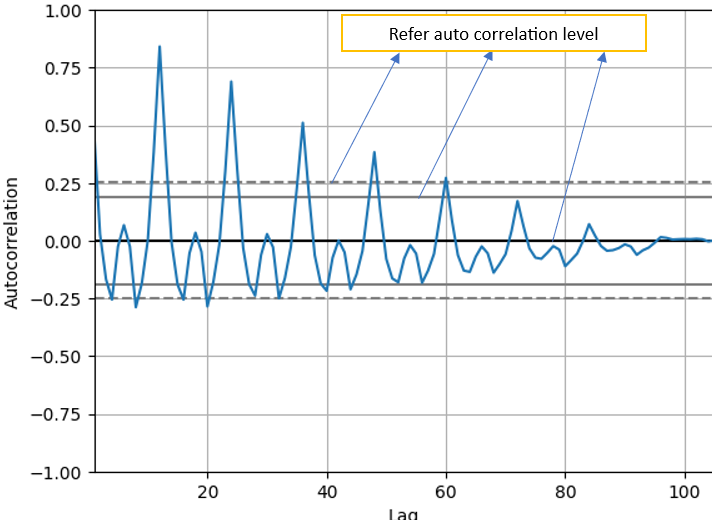

#### Q1. define positive autocorrelation & negative autocorrelation, which one is good?

Let’s delve into the definitions of positive autocorrelation and negative autocorrelation:

* <b>Positive Autocorrelation:</b>

- Positive autocorrelation occurs when a time series variable is positively correlated with its own past values (lags).
- In other words, when the current value of a variable tends to be higher when its past values were also higher, we observe positive autocorrelation.
- Example: If yesterday’s stock price was high, and today’s stock price is also high, there is positive autocorrelation.
- Good or Bad?: Positive autocorrelation can be both good and bad, depending on the context. It’s good when it indicates a predictable pattern (e.g., seasonality) that can be leveraged for forecasting. However, in some cases (like financial markets), extreme positive autocorrelation might lead to bubbles or crashes.
* <b>Negative Autocorrelation:</b>
- Negative autocorrelation occurs when a time series variable is negatively correlated with its own past values (lags).
- When the current value of a variable tends to be lower when its past values were higher, we observe negative autocorrelation.
- Example: If yesterday’s temperature was high, and today’s temperature is lower, there is negative autocorrelation.
- Good or Bad?: Negative autocorrelation can also be both good and bad. It’s good when it indicates a balancing effect (e.g., temperature regulation). However, extreme negative autocorrelation might disrupt stability (e.g., erratic stock prices).

** In summary, both positive and negative autocorrelation have their significance, and their interpretation depends on the specific domain and context of the data being analyzed. Neither is inherently “good” or “bad”; it’s about understanding the underlying patterns and adjusting our strategies accordingly.


## Final Throughts on Autocorrelation and  Partial Autocorrelation

* Identification of an <b>AR Model</b> is often is the best done with the PACF (do it first)
  * For an AR Model, the theoritical PACF "Shuts off" past the order of the model. The phrase "shuts off" means that in the theory the partial autocorrelation are equal to 0 beyond the point. Put anohter way, the number of non-zero partial autocorrelations gives the order of the AR model. By the "order of the model" we mean the most extreme lag of x that is used as a predictor
* Identification of an MA (Moving Average) Model is often is the best done with the ACF rather than the PACF
 * For an AR Model, the theoritical PACF does not Shuts off but instead tapers toward 0 in some manner. A clearer pattern for an MA model is the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.
 
* Remember AR includes three values:
    * p, d, q AR Models lags d differencing q MA lags
- p: AR Model
- q: MA Model


In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [38]:
import statsmodels as sm 
import statsmodels.api as sm # for graphics.tsa

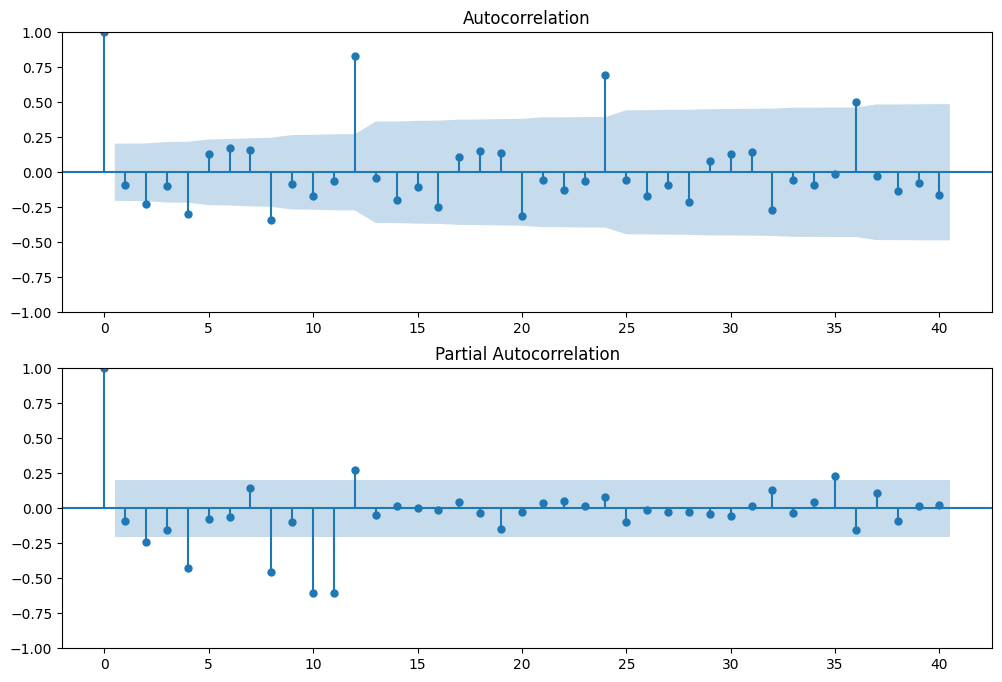

In [43]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['seasonal first difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['seasonal first difference'].iloc[13:], lags=40, ax=ax2)

The first digit (2) represents the number of rows in the subplot grid.
The second digit (2) represents the number of columns in the subplot grid.
The third digit (1) specifies the position of the subplot within the grid.

We have a 2x2 grid (2 rows and 2 columns).
The subplot we’re adding is positioned at the first slot (top left corner) of the grid.
This means that ax1 corresponds to the top left subplot in the figure. Similarly, you can create other subplots using similar notation, adjusting the third digit to position them within the grid. For example:

ax2 = fig.add_subplot(222) would be the top right subplot.
ax3 = fig.add_subplot(223) would be the bottom left subplot.
ax4 = fig.add_subplot(224) would be the bottom right subplot.

### Note-Take away

1. Visualize- plot: there is seasonality in dataset
2. Stationary : not moving or not intended to be moved- lots of ups & down/ not fixed label of patter (mean/ median/mode) its fluctuating over the time, so it not stationary data, we need to make it stationary for better prediction
3. So the data is not stationary (constact) this s a Null Hypothesis in general visualization

#### Differencing

In [24]:
df['sales'][:5] # Initial data

Month
1964-01-01    2815.0
1964-02-01    2672.0
1964-03-01    2755.0
1964-04-01    2721.0
1964-05-01    2946.0
Name: sales, dtype: float64

In [25]:
df['sales'].shift(1)[:5]  # shifting 1 position

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
Name: sales, dtype: float64

In [26]:
df['sales'].shift(5)

Month
1964-01-01        NaN
1964-02-01        NaN
1964-03-01        NaN
1964-04-01        NaN
1964-05-01        NaN
               ...   
1972-05-01    12670.0
1972-06-01     4348.0
1972-07-01     3564.0
1972-08-01     4577.0
1972-09-01     4788.0
Name: sales, Length: 105, dtype: float64